# <center>Miniproyecto 3</center>
## <center>Modelación y Simulación</center>
<center>Javier Anleu Alegría - 17149</center>

<center>Andrea Argüello - 17801</center>

## Problema 1 - El Helecho de Barnsley

In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
f_1= lambda coord: [0.5*(coord[0]-coord[1]),0.5*(coord[0]+coord[1])]
f_2 = lambda coord: [-f_1(coord)[1]+1,f_1(coord)[0]]

In [3]:
random_point = [random.random(),random.random()]
print("Punto aleatorio inicial: %s" % random_point)

Punto aleatorio inicial: [0.9479759113166795, 0.24644152770737504]


In [4]:
points = [random_point]
for i in range(99): # 100 puntos
    function = random.choice([f_1,f_2])
    points.append(function(points[-1]))

In [5]:
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]

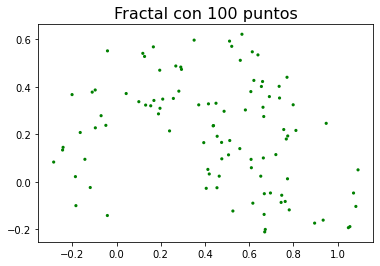

In [6]:
plt.title("Fractal con %d puntos" % len(points), fontsize=16)
plt.scatter(points_x, points_y, s=10, edgecolors='none', c='green')
plt.show()

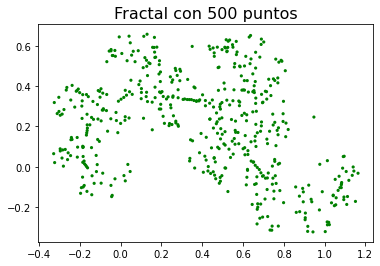

In [7]:
for i in range(400): # 500 puntos
    function = random.choice([f_1,f_2])
    points.append(function(points[-1]))
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]
plt.title("Fractal con %d puntos" % len(points), fontsize=16)
plt.scatter(points_x, points_y, s=10, edgecolors='none', c='green')
plt.show()

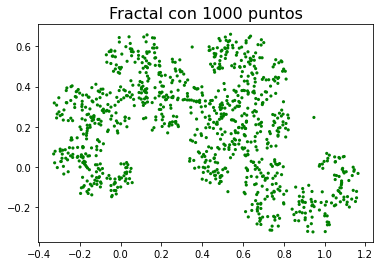

In [8]:
for i in range(500): # 1000 puntos
    function = random.choice([f_1,f_2])
    points.append(function(points[-1]))
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]
plt.title("Fractal con %d puntos" % len(points), fontsize=16)
plt.scatter(points_x, points_y, s=10, edgecolors='none', c='green')
plt.show()

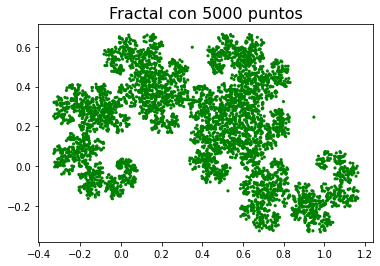

In [9]:
for i in range(4000): # 5000 puntos
    function = random.choice([f_1,f_2])
    points.append(function(points[-1]))
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]
plt.title("Fractal con %d puntos" % len(points), fontsize=16)
plt.scatter(points_x, points_y, s=10, edgecolors='none', c='green')
plt.show()

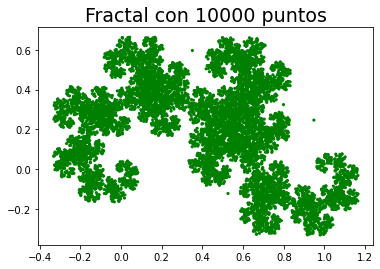

In [10]:
for i in range(5000): # 10000 puntos
    function = random.choice([f_1,f_2])
    points.append(function(points[-1]))
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]
plt.title("Fractal con %d puntos" % len(points), fontsize=16)
plt.title("Fractal con %d puntos" % len(points), fontsize=19)
plt.scatter(points_x, points_y, s=10, edgecolors='none', c='green')
plt.show()

## Problema 2 - Algoritmo *Diamond-Square*

El algoritmo *Diamond-Square* fue propuesto por Alain Fournier, Don Fussel y Loren C. Carpenter en 1982. Es capaz de generar mapas de nivel en para gráficos por computadora, y frecuentemente es utilizado para crear terrenos con apariencia realista de manera artificial. También es conocido como el algoritmo de fractales de desplazamiento aleatorio del punto medio, fractal de nube, o fractal de plasma, esta última debido a que puede utilizarse también para crear la ilusión de movimiento de fluidos, lo que se conoce como *efecto plasma*.

Librerías

In [11]:
import numpy as np
import random

Configuración del *seed*:

In [12]:
random.seed(np.pi*2)

### Funciones para la implementación del algoritmo

Función para determinar puntos medios en la matriz

In [13]:
def midPoint(p1, p2):
    h = int((p1[0]+p2[0]+1)/2)
    v = int((p1[1]+p2[1]+1)/2)
    return [h, v]

Función para generar el valor aleatorio que se agrega a las medias de los puntos. El parámetro `r` tiene como fin reducir la magnitud del valor conforme incrementan las veces que se repite el algoritmo. 

Los parámetros `inf` y `sup` pueden modificarse para cambiar el comportamiento del algoritmo.

In [14]:
inf1 = -100
sup1 = 100
def randVal(r):
    return random.randint(inf1, sup1)/r

La implementación del algoritmo recibe 4 parámetros:
* `matrix`: la matriz a la cual se le quiere aplicar el algoritmo. Esta debe estar compuesta principalmente por ceros, con la excepción de sus esquinas, donde debe contener valores aleatorios.
* `low`: el valor mínimo del índice en la matriz donde se quiere aplicar el algoritmo
* `high`: el valor máximo del índice en la matriz donde se quiere aplicar el algoritmo
* `r`: corresponde al mismo parámetro en la función *randVal*

El algoritmo comienza determinando las coordenadas de las 4 esquinas de la matriz, las cuales contienen valores aleatorios previamente asignados. Luego, realiza el *diamond step*, donde calcula el punto medio entre las esquinas y le asigna un valor que corresponde a la media de las 4 esquinas más un valor aleatorio. Después, realiza el *square step*, que corresponde en asignar un valor (con las mismas especificaciones que en el paso anterior) a los puntos medios de las aristas. Finalmente, determina si hay ceros presentes en la matriz. Si los hay, separa la matriz en 4 cuadrantes y aplica el algoritmo recursivamente a cada uno de ellos, incrementando el valor de `r` por cada iteración.

In [15]:
def diamondSquare (matrix, low, high,r):
    # Determination of corners
    ul = [low, low]
    lr = [high, high]
    
    # Middle Point
    mid = midPoint(ul, lr)
    matrix[mid[0]][mid[1]] = np.mean([matrix[ul[0]][ul[1]],matrix[ul[0]][lr[1]],matrix[lr[0]][ul[1]],matrix[lr[0]][lr[1]]])+random.randint(-1000,1000)/r
    
    # Middle Left
    if matrix[mid[0]][ul[1]] == 0:
        matrix[mid[0]][ul[1]] = np.mean([matrix[ul[0]][ul[1]],matrix[lr[0]][ul[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Middle Up
    if matrix[ul[0]][mid[1]] == 0:
        matrix[ul[0]][mid[1]] = np.mean([matrix[ul[0]][ul[1]],matrix[ul[0]][lr[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Middle Right
    if matrix[mid[0]][lr[1]] == 0:
        matrix[mid[0]][lr[1]] = np.mean([matrix[ul[0]][lr[1]],matrix[lr[0]][lr[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Middle Down
    if matrix[lr[0]][mid[1]] == 0:
        matrix[lr[0]][mid[1]] = np.mean([matrix[lr[0]][ul[1]],matrix[lr[0]][lr[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Counts zeros to determine whether or not to call function again
    zeros = np.count_nonzero(matrix == 0)
    
    if zeros > 0:
        # Increment of r to reduce size of random number added
        r += 1
        
        # Upper left quadrant
        matrix[:mid[0]+1,:mid[0]+1] = diamondSquare(matrix[:mid[0]+1,:mid[0]+1], low, mid[0], r)
        
        # Upper right quadrant
        matrix[:mid[0]+1,mid[0]:high+1] = diamondSquare(matrix[:mid[0]+1,mid[0]:high+1], low, mid[0], r)
        
        # Lower left quadrant
        matrix[mid[0]:high+1,:mid[0]+1] = diamondSquare(matrix[mid[0]:high+1,:mid[0]+1], low, mid[0], r)
        
        # Lower right quadrant
        matrix[mid[0]:high+1,mid[0]:high+1] = diamondSquare(matrix[mid[0]:high+1,mid[0]:high+1], low, mid[0], r)    
    
    return matrix

### Generación de la Matriz

Determinación de la potencia de 2

In [16]:
n = 7

Generación de la matriz de ceros

In [17]:
size = 2**n + 1
matrix = np.zeros((size, size))

Asignación de valores aleatorios a las esquinas. Los parámetros `inf2` y `sup2` pueden modificarse para cambiar el comportamiento del algoritmo.

In [18]:
inf2 = -1000
sup2 = 1000
matrix[0][0], matrix[-1][0], matrix[-1][-1], matrix[0][-1] = [random.randint(-1000,1000) for i in range(4)]

Aplicación del algoritmo en la matriz

In [19]:
low = 0
high = size-1
r = 1
matrix = diamondSquare(matrix, low, high,r)
print(matrix)

[[ 69.          54.36232824  18.5333626  ... 177.61374776 103.79215908
   44.        ]
 [ 56.54709864  49.41076499  13.51252657 ... 206.23843513  87.61987234
  104.13675703]
 [ 37.94481665  21.55443982 -53.54940502 ... 239.78962854 150.97139512
  159.36182732]
 ...
 [815.37090922 891.29091231 895.15735135 ... 256.94682617 293.67935928
  268.21789916]
 [785.27741953 791.74706366 834.26432684 ... 311.08733283 226.98518189
  246.11531273]
 [768.         782.0214002  819.31713693 ... 287.91885938 268.82515661
  268.        ]]


### Gráfica de la superficie generada

Generación de las coordenadas para graficar la superficie.

In [20]:
x = []
y = []
z = []
for i in range(len(matrix)):
    for j in range(len(matrix)):
        x.append(i)
        y.append(j)
        z.append(matrix[i][j])
        
x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

Gráfica de la superficie

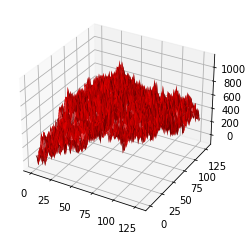

In [21]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes(projection='3d')

ax.plot_trisurf(x,y,z, color='r')